## **1. SciPy**

Python is worth investing some time in if you are doing any kind of data analysis or numeric programming.

SciPy is a package that contains various tools that are built on top of NumPy, using its array data type and related functionality



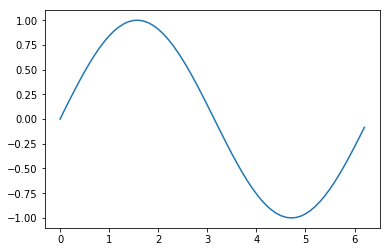

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2 * np.pi, 0.1) 
y = np.sin(x)

plt.plot(x, y)

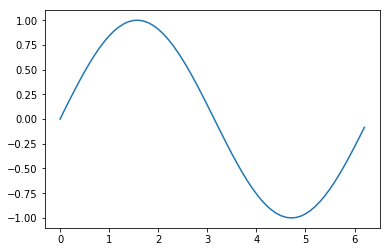

In [18]:
import scipy as sc
import matplotlib.pyplot as plt

x = sc.arange(0, 2 * sc.pi, 0.1) 
y = sc.sin(x)

plt.plot(x, y)

## **2. Numerical Integration**

$$I = \int_{a}^{b}f(x)dx$$

`dblquad` for double integration and `tplquad` for triple integration.

`res, err = quad(f, a, b)` returns a tuple, the first value is the numerical result and the second being the estimation of the numerical error in the result.

#### 
$$I = \int_{0}^{^\pi/_2}2\sin(x)\cos(x)\,dx$$

In [19]:
from scipy import *
from scipy.integrate import quad

def f(x):
    return (2*sin(x)*cos(x))

val, err = quad(f, 0, pi/2)
print("Value of integral:", val)
print("Error in integral:", err)

Value of integral: 0.9999999999999999
Error in integral: 1.1102230246251564e-14


####

we use `Inf` instead of `oo` to refer to infinity.

In [20]:
from scipy import *
from scipy.integrate import quad

val, err = quad(lambda x: 2*sin(x)*cos(x) , 0, pi/2)

print("Value of integral:", val)
print("Error in integral:", err)

# call quad to integrate the function f from -Inf to Inf
val_1, err_1 = quad(lambda x: exp(-x**2) , -Inf, Inf)

print("Value of integral:", val_1)
print("Error in integral:", err_1)


Value of integral: 0.9999999999999999
Error in integral: 1.1102230246251564e-14
Value of integral: 1.7724538509055159
Error in integral: 1.4202636781830878e-08


#### 

$$I = \int_{0}^{2}\int_{0}^{3}x^2ydxdy$$

`def f(y, x)`

`dblquad(f, x0, x1, y0, y1...)`

In [21]:
from scipy import *
from scipy.integrate import quad, dblquad

def f(y, x):
    return x**2 * y

# call dblquad to integrate the function f 
# x goes from 0 to 3
# y goes from 0 to 2
val, err = dblquad(f, 0, 3, lambda x: 0, lambda x: 2)

print("Actual Value:", 18)      # calculated by hand
print("Value of integral:", val)
print("Error in integral:", err)

Actual Value: 18
Value of integral: 18.0
Error in integral: 1.9984014443252818e-13


#### 

$$I = \int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}r^2\sin(\theta) dr d\theta d\phi$$

`def f(z,y, x)`

`tplquad(f, x0, x1, y0, y1, z0, z1)`

In [22]:
from scipy import *
from scipy.integrate import quad, dblquad, tplquad

def f(phi, theta, r):
    return (r**2 * sin(theta))

# call dblquad to integrate the function f 
# r goes from 0 to 3
# theta goes from 0 to pi
# phi goes from 0 to 2pi

val, err = tplquad(f, 0, 3, lambda r: 0, lambda r: pi, lambda r, theta: 0, lambda r, theta: 2*pi)

print("Actual Volume:", (pi) * (3**3) * (4 / 3)) # computed by formula
print("Value of integral:", val)
print("Error in integral:", err)

Actual Volume: 113.09733552923254
Value of integral: 113.09733552923254
Error in integral: 1.2556326592831072e-12


## **3. Interpolation**
插值

`interpld()`

`interp1d(x, y, kind='type')`

Text(0.5,1,'Signal')

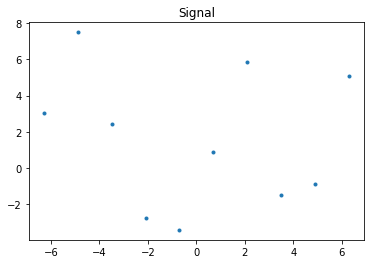

In [23]:
from scipy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt

def f(x):           # function for signal
    return (5 * sin(x)) + (0.1 * x**2) + (0.01 * x**3)

n = 10
x = linspace(-2 * pi, 2 * pi, n)   # generating xdata
noise = randn(n)    # generating random noise
y = f(x) + noise        # adding noise to the signal

# plotting signal
fig, ax = plt.subplots()
ax.plot(x, y, 's', marker='.')  # the third argument creates a scatter plot
ax.set_title('Signal')

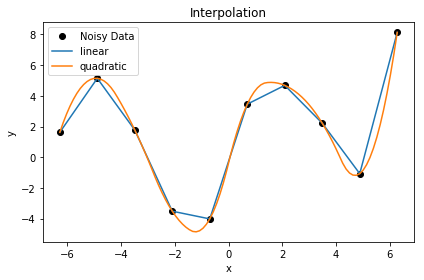

In [24]:
from scipy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt

def f(x):           # function for signal
    return (5 * sin(x)) + (0.1 * x**2) + (0.01 * x**3)

n = 10
x = linspace(-2*pi, 2*pi, n)   # generating xdata
noise = randn(n)    # generating random noise
y = f(x) + noise        # adding noise to the signal

x_plotter = linspace(-2*pi, 2*pi, 100)
y0 = interp1d(x, y, kind='linear')    # interpolation of type linear
y1 = interp1d(x, y, kind='quadratic')  # interpolation of type quadratic

# plotting the signal and interpolations
fig, ax = plt.subplots()

ax.plot(x, y, 's', marker='o', color='k', label='Noisy Data')  # signal
ax.plot(x_plotter, y0(x_plotter), label='linear') 
ax.plot(x_plotter, y1(x_plotter), label='quadratic') 
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interpolation')

fig.tight_layout()

## **4. Polynomial Fitting**

`polyfit(x, y, n)`

array([a, b, c, d])

$y = ax^3 + bx^2 + cx +d$

In [25]:
import numpy as np

x = np.arange(-10, 11)
y = np.random.randn(len(x))     # generating random data for y
z = np.polyfit(x, y, 3)         # computing coeffiecients of polynomial of order 3
print(z)

[-0.0008848   0.00518214  0.10251873  0.05144644]


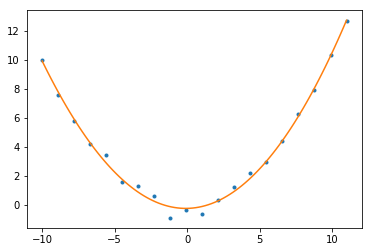

In [26]:
import numpy as np
import matplotlib.pyplot as plt

n = 3           # polynomial order
x = np.linspace(-10, 11, 20)
y = 0.5 * np.random.randn(len(x)) + (0.1 * x**2)   # generating random data for y
z = np.polyfit(x, y, n)         # computing coeffiecients of polynomial of order 3

p = np.poly1d(z)        # generating a polynomial from the coefficients 
xp = np.linspace(-10, 11, 100)   # generating xdata for polynomial plotting

fig, ax = plt.subplots()
ax.plot(x, y, 's', marker='.')    # plotting actual data
ax.plot(xp, p(xp))      # plotting polynomial data

### Choose the right polynomial

`RMSE()` to coumpte the root mean squared error

Root mean square error: 1.0930225462089122e-13


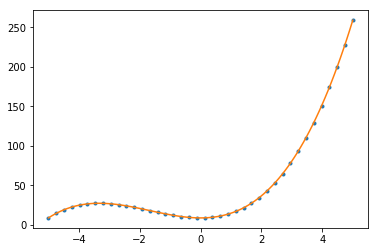

In [27]:
import matplotlib.pyplot as plt

# function to compute root mean square error
def RMSE(y1, y2):
    return (np.square(np.subtract(y1, y2))).mean()

n = 3          # polynomial order
x = np.linspace(-5, 5, 40)
y = x**3 + 5*x**2 + 9      # create random data 

z = np.polyfit(x, y, n)         # computing coeffiecients of polynomial of order n

p = np.poly1d(z)            # generating a polynomial from the coefficients 
xp = np.linspace(-5, 5, 100)      # generating xdata for polynomial plotting

error = RMSE(y, p(x))       # computing error
print("Root mean square error:", np.sqrt(error))

fig, ax = plt.subplots()
ax.plot(x, y, 's', marker='.')      # plotting actual data
ax.plot(xp, p(xp))          # plotting polynomial data

## **5. Curve Fitting**

#### 

$$f(x) = Ae^{ax} + b$$

A =  4.751059889422269 a =  -1.3343821954764707 b =  3.027692694613221


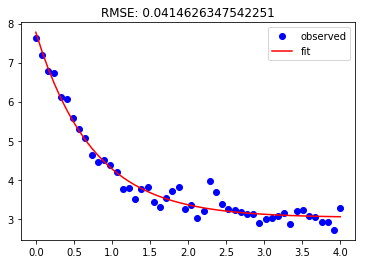

In [28]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def RMSE(y1, y2):
    return (np.square(np.subtract(y1, y2))).mean()

def func(x, A, a, b):
    y = A * np.exp(a * x) + b
    return y
 
x = np.linspace(0, 4, 50)
y = 0.2 * np.random.randn(len(x)) + func(x, 4.5, -1.3, 3) # adding noise to signal

popt, pcov = curve_fit(func, x, y, p0=(3, -1, 2.9)) # p0 are initial estimates
print("A = ", popt[0], "a = ", popt[1], "b = ", popt[2] )
yfit = func(x, *popt) # equivalent to popt[0], popt[1], popt[2] 
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
plt.legend(loc='best')

rmse = RMSE(y, yfit)
plt.title('RMSE: '+str(rmse));

## **6.Optimization**
Optimization, or finding the minima or maxima of a function

`fmin` --- locally minimized

#### 

$$f(x) = \sin(x) - 2e^{-(x-0.4)^2}$$


Optimization terminated successfully.
         Current function value: -1.729779
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 17
         Function evaluations: 34


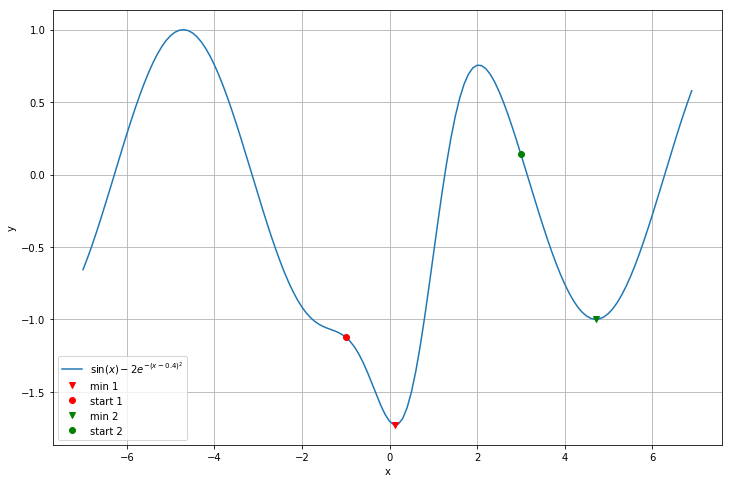

In [29]:
from scipy import *
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return sin(x) -  (2 * exp(-(x - 0.4)**2))

x = arange(-7, 7, 0.1)
y = f(x)

point1 = -1.0 
point2 = 3.0 

min1 = optimize.fmin(f, point1)
min2 = optimize.fmin(f, point2)

fig, ax = plt.subplots(figsize=(12, 8)) 
ax.plot(x, y, label = '$\sin(x)-2e^{-(x-0.4)^2}$')  # plotting curve

ax.plot(min1, f(min1), 's', label='min 1', marker='v', color='r')    # plotting min1 
ax.plot(point1, f(point1), 's', label='start 1', marker='o', color='r')     # plotting starting point for min1

ax.plot(min2, f(min2), 's', label='min 2', marker='v', color='g')    # plotting min2 
ax.plot(point2, f(point2), 's', label='start 2', marker='o', color='g')     # plotting starting point for min2

ax.set_xlabel('x')
ax.grid()
ax.set_ylabel('y')
ax.legend(loc='best')



`fminbound()` finds the minimum of the function in the given range

0.134091356498235


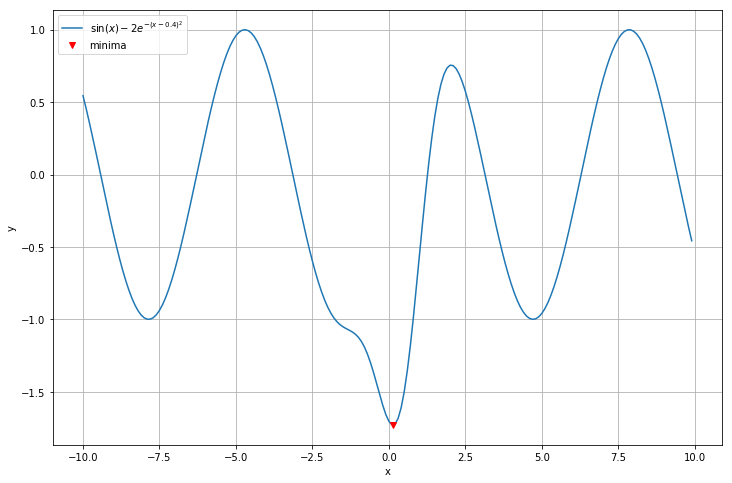

In [30]:
from scipy import *
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return sin(x) -  (2 * exp(-(x - 0.4)**2))

x = arange(-10, 10, 0.1)
y = f(x)

point1 = -2.0 
point2 = 6.0 

minima = optimize.fminbound(f, point1, point2)
print(minima)

fig, ax = plt.subplots(figsize=(12, 8)) 
ax.plot(x, y, label = '$\sin(x)-2e^{-(x-0.4)^2}$')  # plotting curve

ax.plot(minima, f(minima), 's', label='minima', marker='v', color='r')    # plotting min1 

ax.set_xlabel('x')
ax.grid()
ax.set_ylabel('y')
ax.legend(loc='best')

## **7. Fourier Transforms**

Fourier transform is a method for expressing a function as a weighted sum of sinusoids.

Fourier transforms are computed on a time domain signal to check its components in the frequency domain. 

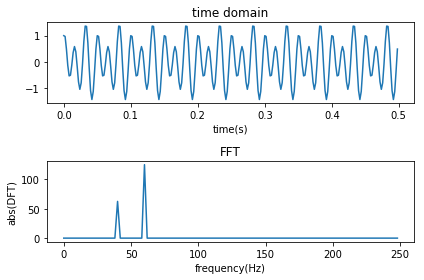

In [31]:
from scipy import *
from scipy import fftpack
import matplotlib.pyplot as plt

sig_length = 0.5  # signal length seconds
sample_rate = 500  # sampling rate in Hz

dt = 1 / sample_rate   # time between samples in [s]
df = 1 / sig_length   # frequency between frequency points in [Hz]

# array for time
t = arange(0, sig_length, dt)

# only considering the positive frequencies
freq = arange(0, sample_rate/2, df)     
n = len(freq)   # length of frequency array 

# generating signal
y = 0.5 * sin(2 * pi * 40 * t) + sin(2 * pi * 60 * t + pi/2)

f = fft(y)      # computing fourier transform

# plotting signal
fig, ax = plt.subplots(2, 1) 
ax[0].plot(t, y) 
ax[0].set_title('time domain') 
ax[0].set_xlabel('time(s)') 

# plotting fourier transform
ax[1].plot(freq, abs(f[0:n]))
ax[1].set_title('FFT') 
ax[1].set_xlabel('frequency(Hz)') 
ax[1].set_ylabel('abs(DFT)') 

fig.tight_layout()

## **8. Exercise**
parameters of a FID signal

$$ y(t) = [\sin(2\pi f_0t)]e^{-\alpha t} $$

freq =  1000.2097733790545 alpha =  77.02200071305239
RMSE  =  0.20055022912078024


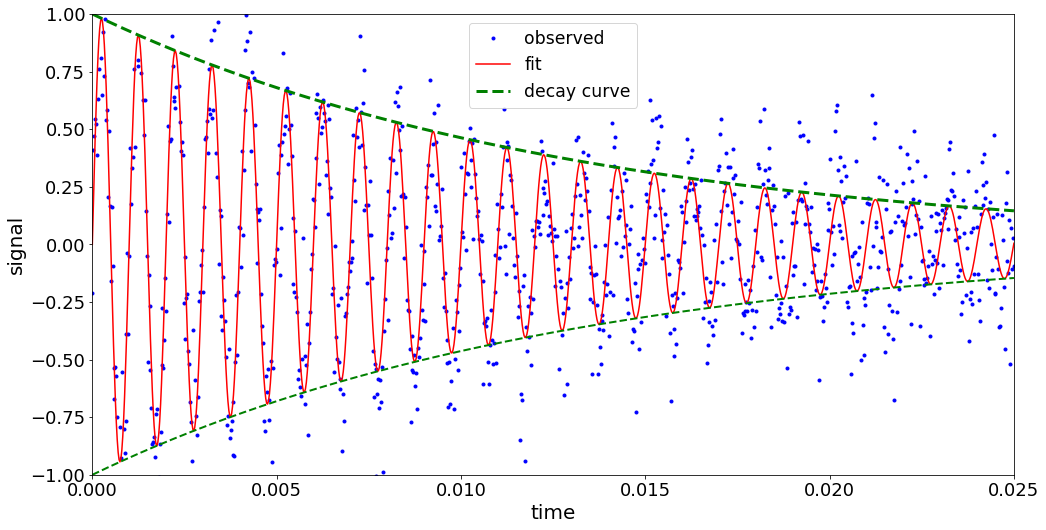

In [32]:
from scipy.optimize import curve_fit

import numpy as np

import matplotlib.pyplot as plt

def RMSE(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

# function for FID signal
def func(x, freq, alpha):
    return np.sin(2 * np.pi * freq * x) * np.exp(-alpha*x)

time = np.linspace(0, 0.025, 1000)

data_noise = 0.2 * np.random.normal(size = time.size)
data = data_noise + func(time, 1000, 75)

popt, pcov = curve_fit(func, time, data,p0=(500, 50))
print("freq = ", popt[0], "alpha = ", popt[1])
yfit = func(time, *popt)

# figure and axes settings
fig = plt.figure(figsize=(16 , 16))
axes = fig.add_axes([0.1, 0.3, 0.8, 0.4])
axes.set_xlabel('time', fontsize='20')
axes.set_ylabel('signal', fontsize='20')
axes.tick_params(axis="both", labelsize=18)
axes.set_xlim(0, max(time))
axes.set_ylim(-1, 1)

# plotting raw data
axes.plot(time, data, '.', color='b', label='observed')

# plotting fitted data
axes.plot(time, yfit, 'r', label = 'fit')

# plotting decay curves
axes.plot(time, np.exp(-1 * popt[1] * time), 'g', linestyle='--', linewidth=3, label='decay curve')
axes.plot(time, -1 * np.exp(-1 * popt[1] * time), 'g', linestyle='--', linewidth=2)

# setting legend
axes.legend(loc='best', fontsize='xx-large')

# print RMSE
print('RMSE  = ', RMSE(data, yfit))